# Analysis of the affect COVID-19 has on Race/Ethnicity

The covid19 pandemic isn’t affecting all communities the same way. In this report analysis, we want to show the differential impact of COVID-19 on race and ethnicity. We will be concentrating on 6 of the largest racial/ethnic groups:  White, Black, Latin/Hispanic, Asians, Native Americans, Asian Pacifc Islander.

Analysis Notes:
  * Latin/Hispanic are more likely to test positive for COVID-19. Latino ethnicity may be reporting an overlapping with race groups. The graph proves that they bear a disproportionate trend in social inequities of COVID-19. 
  
  * The White population appears to be dying more from being tested positive for COVID-19 than Latin/Hispanic. This contradicts our hypothesis that there is disparity amongst the Latino and other ethnic groups.  I had anticipated the chart to show the number of death cases to be highest within the Blacks followed by Latino and thhen Native Americans.  The data collected were not distributed equally across racial and ethnic populations.  This may be why the cases/deaths are not proportional to the actual population of each ethnicity.
  
  * Death cases is not proportional to the number of cases being report
COVID-19 number of cases are increasing with time for all 3 states.  It appears that number of cases plateau for the month of May to June for all ethnic groups in all 3 states except California for Latin/Hispanics, due to the shutdown. In California, the numbers are climbing for Whites and Hispanics.  In Florida, the number of cases are vastly increasing for Blacks, Whites and Hispanics.  In Michigan, only Whites and Blacks.  My graph doesn't show the number of cases increasing for Blacks in California.  Asians and Asian Pacific Islanders appears to have the number of cases leveled with time for all 3 states.

*  Given more time I would have like to include the race/ethnicity population in my data to get a more accurate reading.  I would also have liked to include a regression analysis to predict the number of covid cases and deaths amongst.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [181]:
covid_data_file1 = '../data/race_data_tracker.csv'
covid_tracker_df = pd.read_csv(covid_data_file1, dtype="object", encoding="utf-8")
# covid_tracker_df.shape
#covid_tracker_df.head()

In [3]:
type(covid_tracker_df['Cases_Total'][0])

str

In [4]:
check_for_nan = covid_tracker_df['Cases_Total'].isnull().values.any()
print (check_for_nan)

False


In [5]:
type(covid_tracker_df['Cases_Total'][0])

str

In [6]:
#covid_tracker_df = covid_tracker_df.apply (pd.to_numeric, errors='coerce')

In [7]:
covid_tracker_df['Cases_Total']=covid_tracker_df['Cases_Total'].astype(int)
covid_tracker_df['Cases_White'] = covid_tracker_df['Cases_White'].astype(int)
covid_tracker_df['Cases_Black'] = covid_tracker_df['Cases_Black'].astype(int)
covid_tracker_df['Cases_LatinX'] = covid_tracker_df['Cases_LatinX'].astype(int)
covid_tracker_df['Cases_Asian'] = covid_tracker_df['Cases_Asian'].astype(int)
covid_tracker_df['Cases_AIAN'] = covid_tracker_df['Cases_AIAN'].astype(int)
covid_tracker_df['Cases_NHPI'] = covid_tracker_df['Cases_NHPI'].astype(int)
covid_tracker_df['Cases_Multiracial'] = covid_tracker_df['Cases_Multiracial'].astype(int)
covid_tracker_df['Cases_Other'] = covid_tracker_df['Cases_Other'].astype(int)
covid_tracker_df['Cases_Unknown'] = covid_tracker_df['Cases_Unknown'].astype(int)
covid_tracker_df['Cases_Ethnicity_Hispanic'] = covid_tracker_df['Cases_Ethnicity_Hispanic'].astype(int)
covid_tracker_df['Cases_Ethnicity_NonHispanic'] = covid_tracker_df['Cases_Ethnicity_NonHispanic'].astype(int)
covid_tracker_df['Cases_Ethnicity_Unknown'] = covid_tracker_df['Cases_Ethnicity_Unknown'].astype(int)
covid_tracker_df['Deaths_Total'] = covid_tracker_df['Deaths_Total'].astype(int)
covid_tracker_df['Deaths_White'] = covid_tracker_df['Deaths_White'].astype(int)
covid_tracker_df['Deaths_Black'] = covid_tracker_df['Deaths_Black'].astype(int)
covid_tracker_df['Deaths_LatinX'] = covid_tracker_df['Deaths_LatinX'].astype(int)
covid_tracker_df['Deaths_Asian'] = covid_tracker_df['Deaths_Asian'].astype(int)
covid_tracker_df['Deaths_AIAN'] = covid_tracker_df['Deaths_AIAN'].astype(int)
covid_tracker_df['Deaths_NHPI'] = covid_tracker_df['Deaths_NHPI'].astype(int)
covid_tracker_df['Deaths_Multiracial'] = covid_tracker_df['Deaths_Multiracial'].astype(int)
covid_tracker_df['Deaths_Other'] = covid_tracker_df['Deaths_Other'].astype(int)
covid_tracker_df['Deaths_Unknown'] = covid_tracker_df['Deaths_Unknown'].astype(int)
covid_tracker_df['Deaths_Ethnicity_Hispanic'] = covid_tracker_df['Deaths_Ethnicity_Hispanic'].astype(int)
covid_tracker_df['Deaths_Ethnicity_NonHispanic'] = covid_tracker_df['Deaths_Ethnicity_NonHispanic'].astype(int)
covid_tracker_df['Deaths_Ethnicity_Unknown'] = covid_tracker_df['Deaths_Ethnicity_Unknown'].astype(int)


In [8]:
type(covid_tracker_df['Cases_Total'][0])

numpy.int64

In [9]:
july22_df = covid_tracker_df[covid_tracker_df['Date'] == '20200722']
july22_df.head(10)

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
0,20200722,AK,2132,750,49,0,67,282,76,61,...,0,2,4,1,0,0,1,0,18,1
1,20200722,AL,71813,22694,20884,0,267,0,0,0,...,0,4,0,0,0,27,100,45,1126,193
2,20200722,AR,35246,17406,7521,0,498,101,1985,0,...,0,6,0,30,0,27,3,41,336,3
3,20200722,AS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20200722,AZ,150609,24130,3246,34645,1096,9085,0,0,...,786,32,394,0,0,53,495,786,1693,495
5,20200722,CA,413576,46562,11396,146903,14920,587,1590,1967,...,3455,1008,27,41,41,93,198,3455,4217,198
6,20200722,CO,41698,12771,1874,13897,840,204,127,381,...,361,53,11,5,20,6,53,361,1224,53
7,20200722,CT,48223,17226,6375,9249,695,44,0,143,...,380,48,2,0,32,21,42,380,3984,42
8,20200722,DC,11529,2343,5637,0,178,27,30,0,...,76,8,0,0,0,6,0,76,504,0
9,20200722,DE,13792,4584,3529,3605,192,0,0,0,...,35,1,0,0,0,6,23,35,469,23


In [10]:
july22_df.columns

Index(['Date', 'State', 'Cases_Total', 'Cases_White', 'Cases_Black',
       'Cases_LatinX', 'Cases_Asian', 'Cases_AIAN', 'Cases_NHPI',
       'Cases_Multiracial', 'Cases_Other', 'Cases_Unknown',
       'Cases_Ethnicity_Hispanic', 'Cases_Ethnicity_NonHispanic',
       'Cases_Ethnicity_Unknown', 'Deaths_Total', 'Deaths_White',
       'Deaths_Black', 'Deaths_LatinX', 'Deaths_Asian', 'Deaths_AIAN',
       'Deaths_NHPI', 'Deaths_Multiracial', 'Deaths_Other', 'Deaths_Unknown',
       'Deaths_Ethnicity_Hispanic', 'Deaths_Ethnicity_NonHispanic',
       'Deaths_Ethnicity_Unknown'],
      dtype='object')

In [11]:
cases_tot = july22_df['Cases_Total'].sum()
cases_white_tot = july22_df['Cases_White'].sum()
cases_black_tot = july22_df['Cases_Black'].sum() 
cases_latinx_tot = july22_df['Cases_LatinX'].sum()
cases_asian_tot = july22_df['Cases_Asian'].sum()
cases_aian_tot = july22_df['Cases_AIAN'].sum()
cases_nhpi_tot = july22_df['Cases_NHPI'].sum()
cases_hisp_tot = july22_df['Cases_Ethnicity_Hispanic'].sum()
cases_latin_hisp_tot = cases_latinx_tot + cases_hisp_tot
cases_ethnicity_unknown = july22_df['Cases_Ethnicity_Unknown'].sum()

deaths_tot = july22_df['Deaths_Total'].sum()
deaths_white_tot = july22_df['Deaths_White'].sum()
deaths_black_tot = july22_df['Deaths_Black'].sum()
deaths_latinx_tot = july22_df['Deaths_LatinX'].sum()
deaths_asian_tot = july22_df['Deaths_Asian'].sum()
deaths_aian_tot = july22_df['Deaths_AIAN'].sum()
deaths_nhpi_tot = july22_df['Deaths_NHPI'].sum()
deaths_hisp_tot = july22_df['Deaths_Ethnicity_Hispanic'].sum()
deaths_latin_hisp_tot = deaths_latinx_tot + deaths_hisp_tot
deaths_ethnicity_unknown = july22_df['Deaths_Ethnicity_Unknown'].sum()

In [12]:
#ethn_case_summary = pd.DataFrame({'Cases White': [cases_white_tot],
#                                  'Cases Black': [cases_black_tot],
#                                  'Cases Asian': [cases_asian_tot],
#                                  'Cases Latin/Hispanic': [cases_latin_hisp_tot],
#                                  'Cases_aian_tot': [cases_aian_tot],
#                                  'Cases nhpi_tot': [cases_nhpi_tot]})
#
#ethn_death_summary = pd.DataFrame({'Death Total': [deaths_tot],
#                                   'Death White': [deaths_white_tot],
#                                   'Death Black': [deaths_black_tot],
#                                   'Death Asian': [deaths_asian_tot],
#                                   'Death Latin/Hispanic': [deaths_latin_hisp_tot],
#                                   'Death aian_tot': [deaths_aian_tot],
#                                   'Death nhpi_tot': [deaths_nhpi_tot]})                           

In [13]:
ethn_case_summary = pd.DataFrame({'Ethnicity/Race': ['White','Black','Asian','Latin/Hispanic','Native American','Asian Pacific',\
                                                    'Ethnicity Cases Unknown'],
                           'Cases': [cases_white_tot,cases_black_tot,cases_asian_tot,cases_latin_hisp_tot,cases_aian_tot,\
                                           cases_nhpi_tot, cases_ethnicity_unknown]})
ethn_case_summary

,Ethnicity/Race,Cases
0,White,915136
1,Black,468407
2,Asian,68516
3,Latin/Hispanic,1238438
4,Native American,28443
5,Asian Pacific,8779
6,Ethnicity Cases Unknown,1513017


In [14]:
ethn_death_summary = pd.DataFrame({'Ethnicity/Race': ['White','Black','Asian','Latin/Hispanic','Native American','Asian Pacific',\
                                                      'Ethnicity Deaths Unknown'],
                           'Death Cases': [deaths_white_tot,deaths_black_tot,deaths_asian_tot,deaths_latin_hisp_tot,\
                                           deaths_aian_tot, deaths_nhpi_tot,deaths_ethnicity_unknown]})
ethn_death_summary

,Ethnicity/Race,Death Cases
0,White,65820
1,Black,28856
2,Asian,5227
3,Latin/Hispanic,40680
4,Native American,997
5,Asian Pacific,152
6,Ethnicity Deaths Unknown,15147


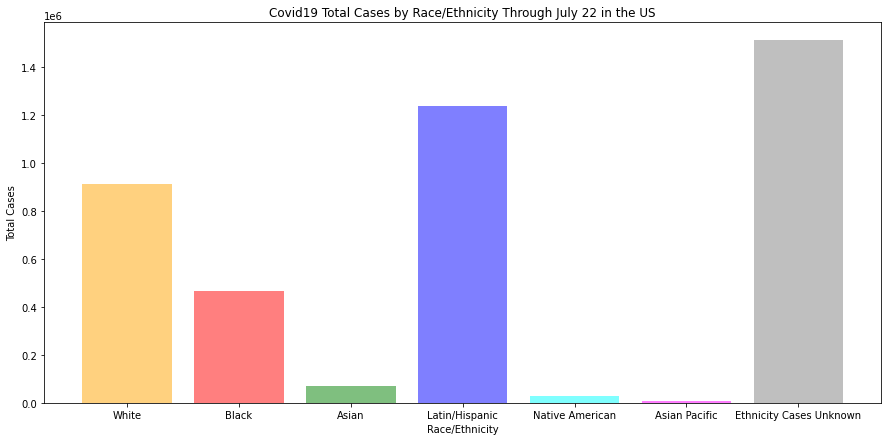

In [182]:
x_axis = np.arange(len(ethn_case_summary))
plt.figure(figsize=(15,7))
plt.bar(x_axis, ethn_case_summary["Cases"], color=('orange', 'red', 'green', 'blue', 'cyan','magenta','gray'),
        alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,ethn_case_summary["Ethnicity/Race"])
# Give our chart some labels and a tile
plt.title("Covid19 Total Cases by Race/Ethnicity Through July 22 in the US")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Total Cases")

plt.savefig("../Images/EthnicityCase_bar.png")
plt.show()

Latin/Hispanic more likely to test positive for COVID-19.  Latino ethnicity may be reporting an overlapping with race groups.  But this graph proves that they bear a disproportionate share of infections within their community.
Note:  'If cases were distributed equally across racial and ethnic populations, one would expect to see more cases in those populations that are more highly represented in geographic areas that contributed data'.

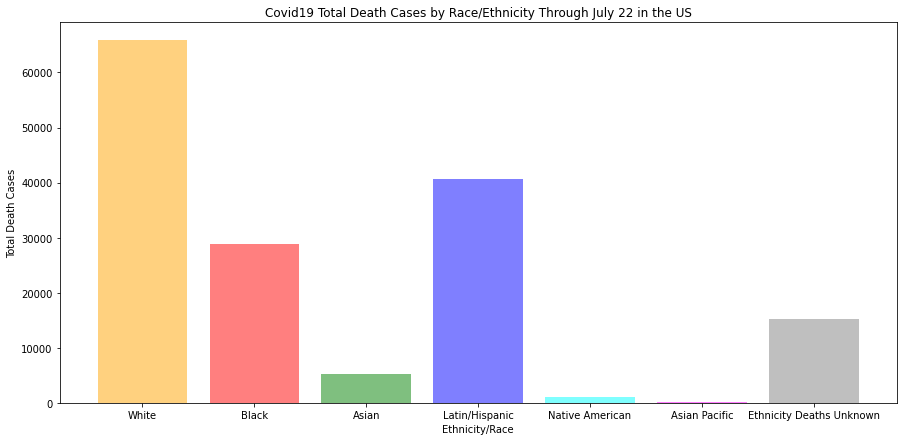

In [183]:
x_axis = np.arange(len(ethn_death_summary))
plt.figure(figsize=(15,7))
plt.bar(x_axis, ethn_death_summary["Death Cases"], color=('orange', 'red', 'green', 'blue', 'cyan','magenta','gray'),
        alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,ethn_death_summary["Ethnicity/Race"])
# Give our chart some labels and a tile
plt.title("Covid19 Total Death Cases by Race/Ethnicity Through July 22 in the US")
plt.xlabel("Ethnicity/Race")
plt.ylabel("Total Death Cases")
#plt.xlim(-0.75, len(x_axis)-0.25)
plt.savefig("../Images/EthnicityDeath_bar.png")
plt.show()

The White population appears to be dying more from being tested positive for COVID-19 than Latin/Hispancics ethnicity.  This contradicts our hypothesis that there is disparity amongst the Latino and other ethnic groups. 

In [184]:
ethn_death_summary.head(10)

,Ethnicity/Race,Death Cases
0,White,65820
1,Black,28856
2,Asian,5227
3,Latin/Hispanic,40680
4,Native American,997
5,Asian Pacific,152
6,Ethnicity Deaths Unknown,15147


In [185]:
#set the data frame column name to be keys
race_dict = ethn_case_summary.to_dict()
tot_cases_list = list(race_dict['Cases'].values())
race_list = list(race_dict['Ethnicity/Race'].values())


In [186]:
print(race_list)
print(tot_cases_list)

['White', 'Black', 'Asian', 'Latin/Hispanic', 'Native American', 'Asian Pacific', 'Ethnicity Cases Unknown']
[915136, 468407, 68516, 1238438, 28443, 8779, 1513017]


In [187]:
colors = ["lightcoral","lightblue","orange","red","purple","yellow","green"]
explode = (0,0,0,0.3,0.5,0,0)

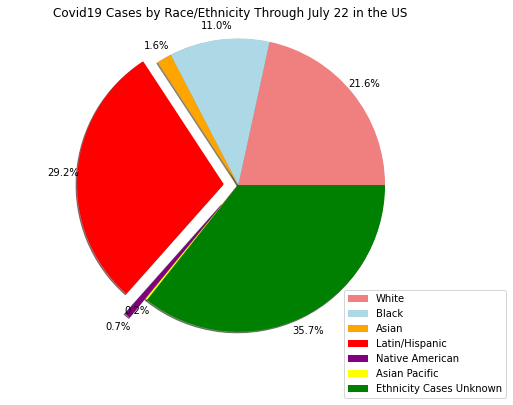

In [21]:
# Tell matplotlib to create a pie chart based upon the above data
#plt.pie(tot_cases_list, labels=race_list, colors=colors,
#        autopct="%1.1f%%", shadow=True, startangle=140)
plt.figure(figsize=(8,6))
plt.pie(tot_cases_list, explode=explode,colors=colors,pctdistance=1.1, labeldistance=1.2,
        autopct="%1.1f%%",startangle=0,shadow=True, radius=3)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('Covid19 Cases by Race/Ethnicity Through July 22 in the US' )
plt.legend(race_list, bbox_to_anchor=(1,0),loc='lower right',
                      bbox_transform=plt.gcf().transFigure)
 
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/CasesVsRaceEthnicity_pie.png")
plt.show()

The percentage of Latin/Hispanic cases are higher than Whites.  There is a large portion of unknown ethnicity cases.   

In [188]:
cases_deaths_dict = {'Cases': [cases_white_tot,cases_black_tot,cases_asian_tot,cases_latin_hisp_tot,cases_aian_tot,\
                                cases_nhpi_tot],
                     'Deaths': [deaths_white_tot,deaths_black_tot,deaths_asian_tot,deaths_latin_hisp_tot,\
                                deaths_aian_tot,cases_nhpi_tot]}
index = ['White', 'Black', 'Asian', 'Latin/Hispanic', 'Native American', 'Asian Pacific']
cases_deaths_df = pd.DataFrame(cases_deaths_dict)

In [189]:
cases_deaths_df.index = index;
cases_deaths_df.head()

,Cases,Deaths
White,915136,65820
Black,468407,28856
Asian,68516,5227
Latin/Hispanic,1238438,40680
Native American,28443,997


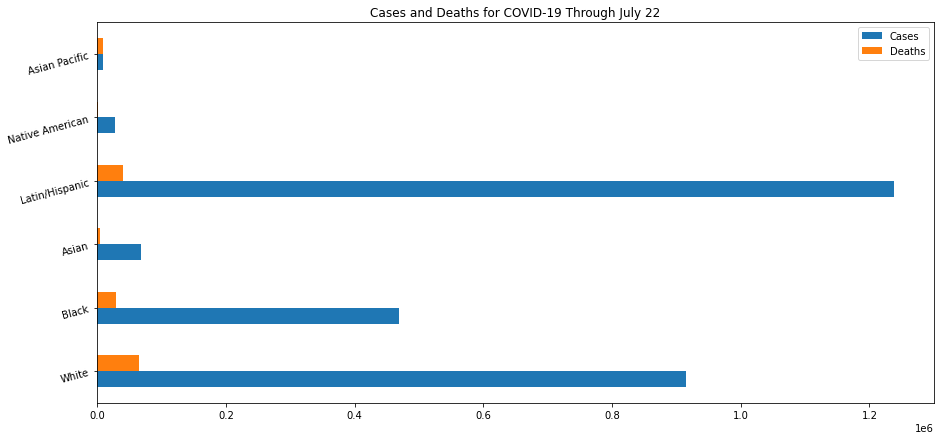

In [192]:
cases_deaths_df.plot.barh(rot=15, title="Cases and Deaths for COVID-19 Through July 22",figsize=(15,7));
plt.savefig("../Images/CasesDeaths_bar.png")
plt.show(block=True);

Death cases is not proportional to the number of cases being report.  Latin/Hispanic ethnicity surpass in other race/ethnicity for testing positive.  Death rates appears low in comparison to such a high report postive test cases.  Asian Pacific Islander has a low case/death and it appears to be the same.

In [25]:
top_states_df = covid_tracker_df[(covid_tracker_df['State'] == 'CA') |
                                  (covid_tracker_df['State'] == 'FL') |\
                                  (covid_tracker_df['State'] == 'NY') |\
                                  (covid_tracker_df['State'] == 'TX')]
top_states_df

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown
5,20200722,CA,413576,46562,11396,146903,14920,587,1590,1967,...,3455,1008,27,41,41,93,198,3455,4217,198
10,20200722,FL,379619,78227,52834,93126,0,0,0,0,...,1358,0,0,0,0,185,340,1358,3502,599
37,20200722,NY,408886,0,0,0,0,0,0,0,...,6665,1683,0,0,0,1842,3016,6665,18451,3016
47,20200722,TX,351618,7428,3491,11999,671,0,0,0,...,229,15,0,0,0,1,3679,229,440,3679
61,20200719,CA,384692,43542,10678,137657,14187,550,1496,1842,...,3359,993,25,40,41,91,184,3359,4142,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,20200415,TX,2182,838,250,552,98,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1629,20200412,CA,21794,4323,945,4729,1756,27,270,0,...,147,92,2,4,0,10,118,0,0,0
1634,20200412,FL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1661,20200412,NY,0,0,0,0,0,0,0,0,...,0,576,0,0,0,374,0,2656,0,0


In [101]:
#covid_tracker_df[covid_tracker_df['State'] == 'CA']

In [28]:
#states = top_states_df['State'].unique()
#list(states)

In [193]:
dates = top_states_df['Date'].unique()
dates

array(['20200722', '20200719', '20200715', '20200712', '20200708',
       '20200705', '20200701', '20200628', '20200624', '20200621',
       '20200617', '20200614', '20200610', '20200607', '20200603',
       '20200531', '20200527', '20200524', '20200520', '20200517',
       '20200513', '20200510', '20200506', '20200503', '20200429',
       '20200426', '20200422', '20200419', '20200415', '20200412'],
      dtype=object)

In [194]:
cases_df = top_states_df[['Date','State','Cases_White','Cases_Black','Cases_LatinX','Cases_Asian','Cases_AIAN']]
cases_df.head()

,Date,State,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN
5,20200722,CA,46562,11396,146903,14920,587
10,20200722,FL,78227,52834,93126,0,0
37,20200722,NY,0,0,0,0,0
47,20200722,TX,7428,3491,11999,671,0
61,20200719,CA,43542,10678,137657,14187,550


In [195]:
covid_CA = covid_tracker_df[covid_tracker_df['State'] == 'CA'].sort_values(by=["Date"],ascending=True)
covid_MI = covid_tracker_df[covid_tracker_df['State'] == 'MI'].sort_values(by=["Date"],ascending=True)
covid_NY = covid_tracker_df[covid_tracker_df['State'] == 'NY'].sort_values(by=["Date"],ascending=True)
covid_FL = covid_tracker_df[covid_tracker_df['State'] == 'FL'].sort_values(by=["Date"],ascending=True)
covid_TX = covid_tracker_df[covid_tracker_df['State'] == 'TX'].sort_values(by=["Date"],ascending=True)
#c1=covid_tracker_df[covid_tracker_df['State'] == 'CA'].sort_values(by=["Date"])['Cases_White'].astype(int)

In [196]:
covid_CA[covid_CA['Cases_White'] == 4323]

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Deaths_LatinX,Deaths_Asian,Deaths_AIAN,Deaths_NHPI,Deaths_Multiracial,Deaths_Other,Deaths_Unknown,Deaths_Ethnicity_Hispanic,Deaths_Ethnicity_NonHispanic,Deaths_Ethnicity_Unknown


In [197]:
#print(c1)

In [198]:
# Create series for each ethnicity in their respective state.
c1 = covid_CA['Cases_White'].astype(int)
c2 = covid_CA['Cases_Black'].astype(int)
c3 = covid_CA['Cases_LatinX'].astype(int)
c4 = covid_CA['Cases_Asian'].astype(int)
c5 = covid_CA['Cases_AIAN'].astype(int)

f1 = covid_FL['Cases_White'].astype(int)
f2 = covid_FL['Cases_Black'].astype(int)
f3 = covid_FL['Cases_LatinX'].astype(int)
f4 = covid_FL['Cases_Asian'].astype(int)
f5 = covid_FL['Cases_AIAN'].astype(int)

m1 = covid_MI['Cases_White'].astype(int)
m2 = covid_MI['Cases_Black'].astype(int)
m3 = covid_MI['Cases_LatinX'].astype(int)
m4 = covid_MI['Cases_Asian'].astype(int)
m5 = covid_MI['Cases_AIAN'].astype(int)

In [199]:
type(c1)

pandas.core.series.Series

In [200]:
#type(y1[1629])

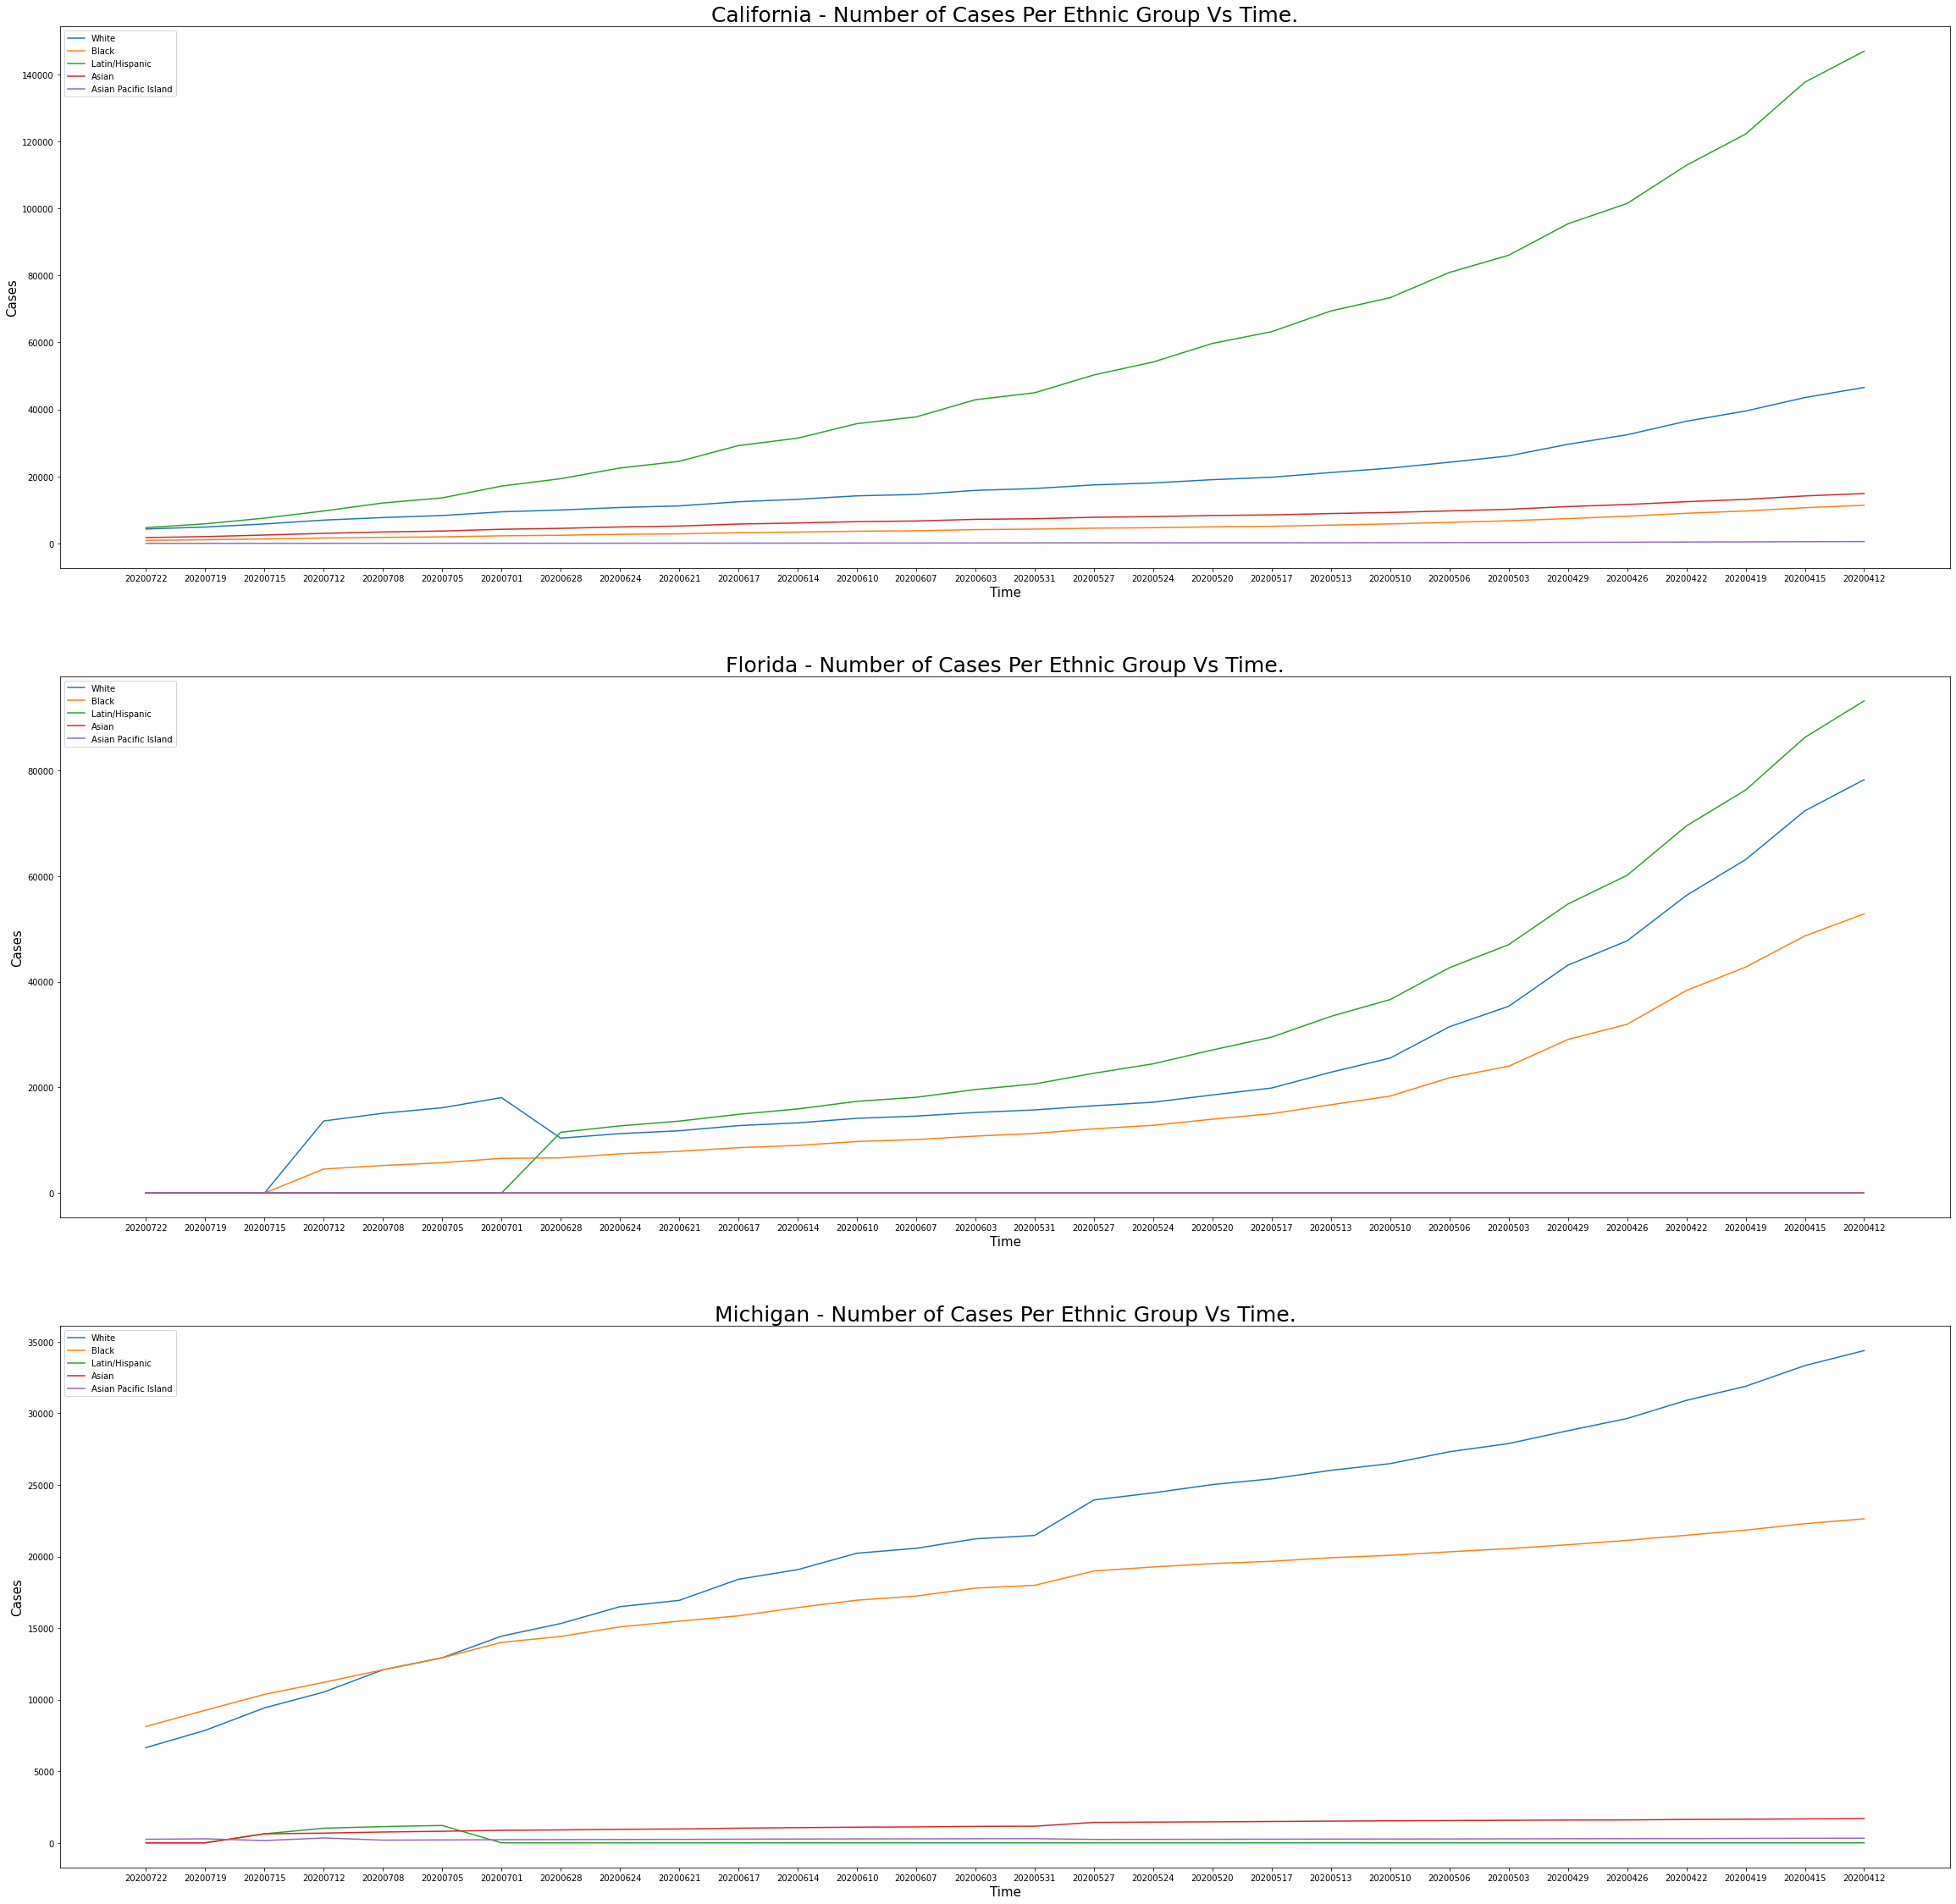

In [201]:
fig, axs = plt.subplots(3,figsize=(40,40))

axs[0].plot(dates,c1,label="White")
axs[0].plot(dates,c2,label="Black")
axs[0].plot(dates,c3,label="Latin/Hispanic")
axs[0].plot(dates,c4,label="Asian")
axs[0].plot(dates,c5,label="Asian Pacific Island")
axs[0].legend()

# Add titles
axs[0].set_title("California - Number of Cases Per Ethnic Group Vs Time.", loc='center', fontsize=25, fontweight=0, color='Black')
axs[0].set_xlabel("Time",fontsize=15)
axs[0].set_ylabel("Cases",fontsize=15)
 
axs[1].plot(dates,f1,label="White")
axs[1].plot(dates,f2,label="Black")
axs[1].plot(dates,f3,label="Latin/Hispanic")
axs[1].plot(dates,f4,label="Asian")
axs[1].plot(dates,f5,label="Asian Pacific Island")
axs[1].legend()
axs[1].set_title("Florida - Number of Cases Per Ethnic Group Vs Time.", loc='center', fontsize=25, fontweight=0, color='Black')
axs[1].set_xlabel("Time",fontsize=15)
axs[1].set_ylabel("Cases",fontsize=15)

axs[2].plot(dates,m1,label="White")
axs[2].plot(dates,m2,label="Black")
axs[2].plot(dates,m3,label="Latin/Hispanic")
axs[2].plot(dates,m4,label="Asian")
axs[2].plot(dates,m5,label="Asian Pacific Island")
axs[2].legend()
axs[2].set_title("Michigan - Number of Cases Per Ethnic Group Vs Time.", loc='center', fontsize=25, fontweight=0, color='Black')
axs[2].set_xlabel("Time",fontsize=15)
axs[2].set_ylabel("Cases",fontsize=15)

plt.savefig("../Images/EthnicityTop3StateCase_line.png")
plt.show()

COVID-19 number of cases are increasing with time for all 3 states.  It appears that number of cases plateau for the month of May to June for all ethnic groups in all 3 states except California for Latin/Hispanics, due to the shutdown. In California, the numbers are climbing for Whites and Hispanics.  In Florida, the number of cases are vastly increasing for Blacks, Whites and Hispanics.  In Michigan, only Whites and Blacks.  My graph doesn't show the number of cases increasing for Blacks in California.  Asians and Asian Pacific Islanders appears to have the number of cases leveled with time for all 3 states.